In [2]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


Version of the analysis code which only looks at the histograms stored in the data file. This will be the only version which is possible when analyzing the full dataset (unless you want a 1 TB root file to loop through)

In [3]:
#f = r.TFile("./data/results_histOnly_EvWonly.root") #this file created with an older version of the code, only has the EvW data but a huge dataset.
#f = r.TFile("./data/gm2offline_ana_100files.root") #only 100 files, but newer (Oct 11) version of the code
f = r.TFile("./data/results_histOnly_Oct16.root ") 

In [4]:
f.cd("farline")
f.ls()

TFile**		./data/results_histOnly_Oct16.root	
 TFile*		./data/results_histOnly_Oct16.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   KEY: TDirectoryFile	evw_calo1;1	evw_calo1
   KEY: TDirectoryFile	evw_calo2;1	evw_calo2
   KEY: TDirectoryFile	evw_calo3;1	evw_calo3
   KEY: TDirectoryFile	evw_calo4;1	evw_calo4
   KEY: TDirectoryFile	evw_calo5;1	evw_calo5
   KEY: TDirectoryFile	evw_calo6;1	evw_calo6
   KEY: TDirectoryFile	evw_calo7;1	evw_calo7
   KEY: TDirectoryFile	evw_calo8;1	evw_calo8
   KEY: TDirectoryFile	evw_calo9;1	evw_calo9
   KEY: TDirectoryFile	evw_calo10;1	evw_calo10
   KEY: TDirectoryFile	evw_calo11;1	evw_calo11
   KEY: TDirectoryFile	evw_calo12;1	evw_calo12
   KEY: TDirectoryFile	evw_calo13;1	evw_calo13
   KEY: TDirectoryFile	evw_calo14;1	evw_calo14
   KEY: TDirectoryFile	evw_calo15;1	evw_calo15
   KEY: TDirectoryFile	evw_calo16;1	evw_calo16
   KEY: TDirectoryFile	evw_calo17;1	evw_calo17
   KEY: TDirectoryFile	evw_calo18;1	evw_calo18
   KEY: TDir

---

Lets first look at the comparison plots

Info in <TCanvas::SaveAs>: ROOT file ./c2.root has been created


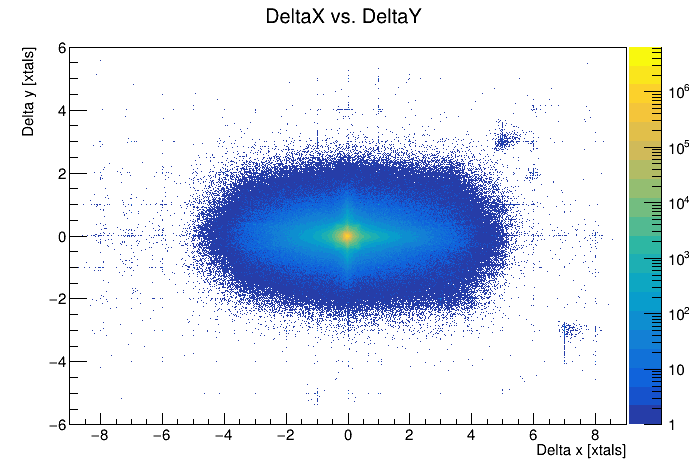

In [5]:
c2 = r.TCanvas()
hdeltaxy = f.Get("farline").Get("evwDeltaXDeltaY").Clone()
hdeltaxy.Draw("COLZ")
#hdeltaxy.Rebin2D(5,5)
hdeltaxy.GetXaxis().SetRangeUser(-9,9)
hdeltaxy.GetYaxis().SetRangeUser(-6,6)
c2.SetLogz()
c2.Draw()
c2.Print("./c2.root")

Info in <TCanvas::SaveAs>: ROOT file ./c3.root has been created


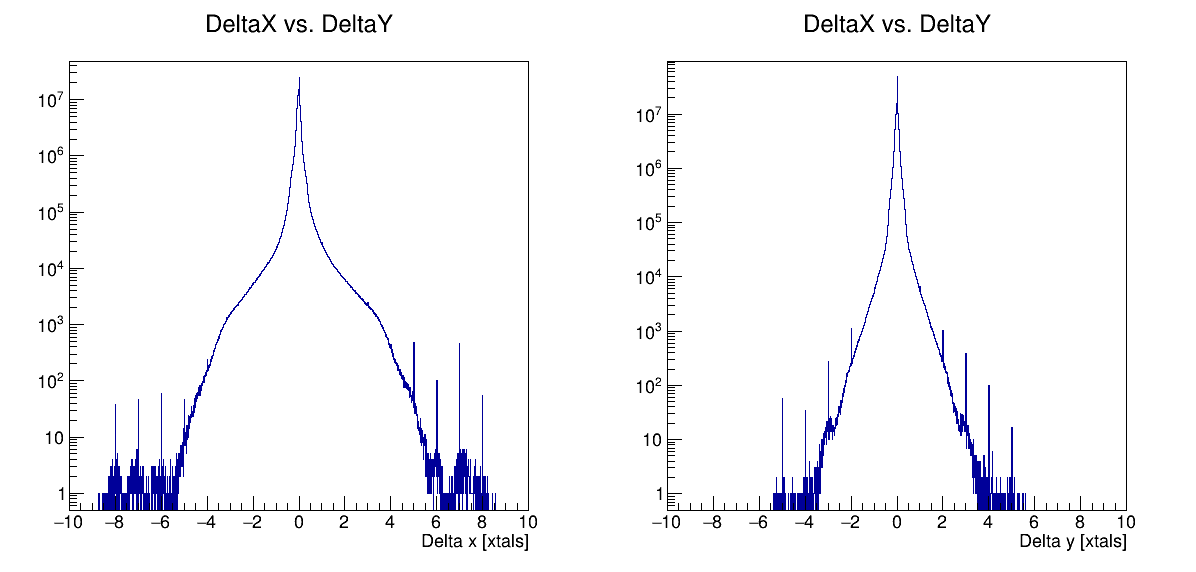

In [6]:
hdeltaxy.GetXaxis().SetRangeUser(-10,10)
hdeltaxy.GetYaxis().SetRangeUser(-10,10)

c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)
c3.cd(1)
r.gPad.SetLogy()
hdeltax = hdeltaxy.ProjectionX().Clone()
hdeltax.Draw()

c3.cd(2)
r.gPad.SetLogy()
hdeltay = hdeltaxy.ProjectionY().Clone()
hdeltay.Draw()

c3.Draw()
c3.Print("./c3.root")

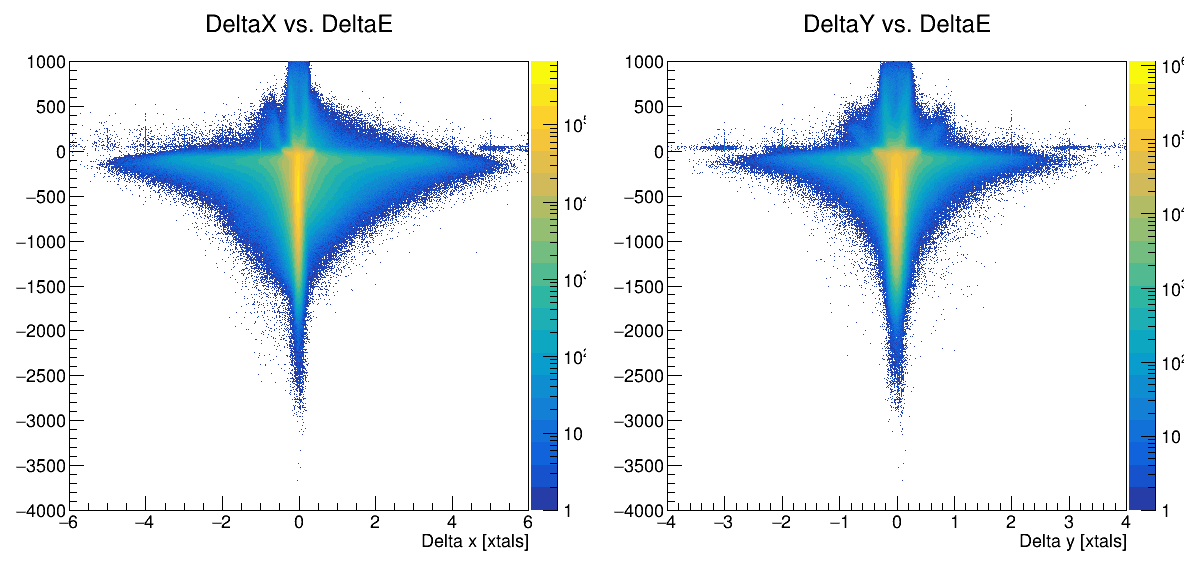

In [7]:
c2 = r.TCanvas("c2","c2",1200,600)
c2.Divide(2)
c2.cd(1)
evwDeltaXDeltaE = f.Get("farline").Get("evwDeltaXDeltaE").Clone()
evwDeltaXDeltaE.Draw("colz")
#evwDeltaXDeltaE.Rebin2D(5,5)
evwDeltaXDeltaE.GetXaxis().SetRangeUser(-6,6)
evwDeltaXDeltaE.GetYaxis().SetRangeUser(-4000,1000)
r.gPad.SetLogz()
c2.cd(2)
evwDeltaYDeltaE = f.Get("farline").Get("evwDeltaYDeltaE").Clone()
evwDeltaYDeltaE.Draw("colz")
#evwDeltaYDeltaE.Rebin2D(5,5)
evwDeltaYDeltaE.GetXaxis().SetRangeUser(-4,4)
evwDeltaYDeltaE.GetYaxis().SetRangeUser(-4000,1000)
r.gPad.SetLogz()
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


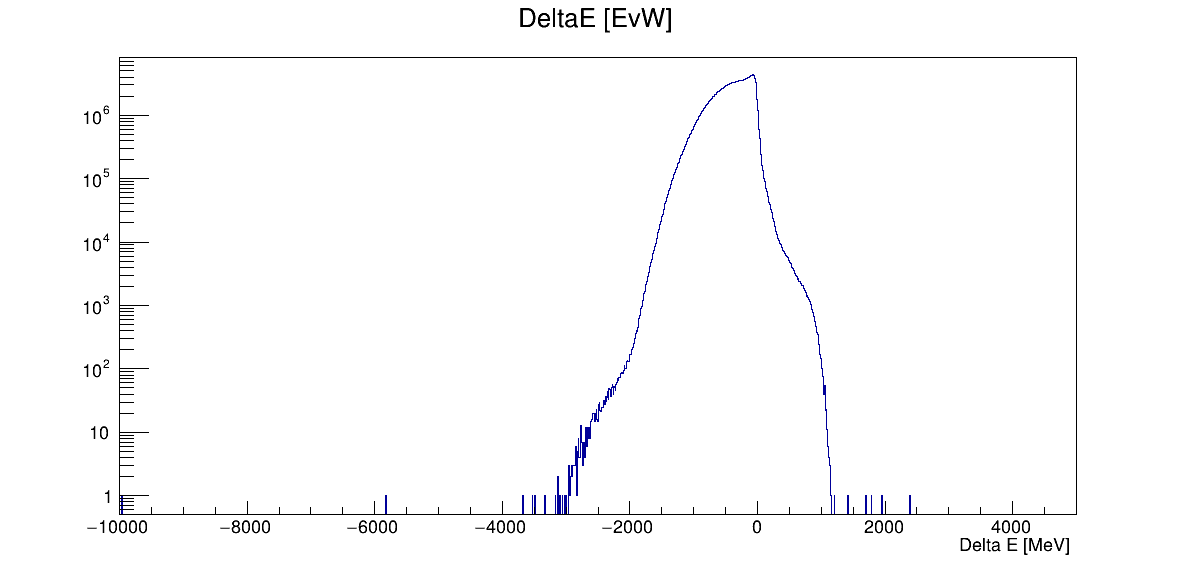

In [8]:
c2 = r.TCanvas("c2","c2",1200,600)
evwDeltaE = f.Get("farline").Get("evwDeltaXDeltaE").Clone().ProjectionY()
evwDeltaE.SetTitle("DeltaE [EvW]")
evwDeltaE.Draw()
c2.SetLogy()
c2.Draw()


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  1.44381e+11
NDf                       =        69801
Edm                       =  2.99334e-09
NCalls                    =           29
p0                        =            0                      	 (fixed)
p1                        =      1.48796   +/-   0.000931002 


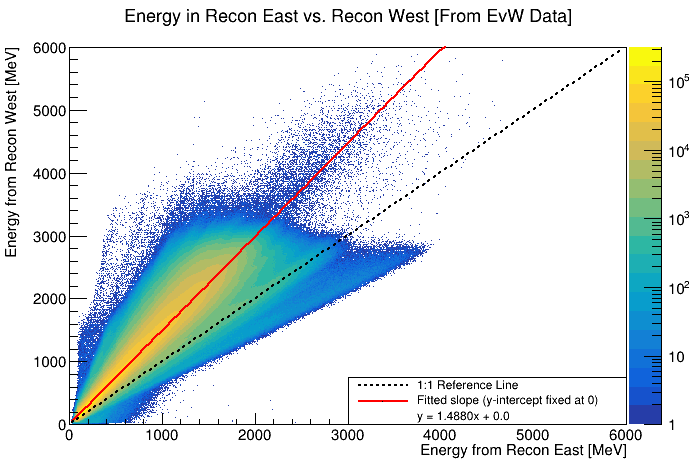

In [9]:
r.gStyle.SetOptFit(0)

c3 = r.TCanvas()
evwEnergyEvW = f.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.SetTitle("Energy in Recon East vs. Recon West [From EvW Data]")
#evwEnergyEvW.GetXaxis().SetRangeUser(0,3000)
#evwEnergyEvW.GetYaxis().SetRangeUser(0,4000)
evwEnergyEvW.Draw("colz")

onetoone = r.TF1("onetoone","pol1",0,6000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

actualslope = r.TF1("actualslope","pol1",0,6000)
actualslope.FixParameter(0,0)
evwEnergyEvW.Fit("actualslope","REMB")

leg = r.TLegend(0.5,0.1,0.9,0.2)
leg.AddEntry(onetoone ,"1:1 Reference Line", "l")
leg.AddEntry(actualslope ,"Fitted slope (y-intercept fixed at 0)", "pl")
leg.AddEntry(actualslope ,"y = "+str("%.4f" % round(actualslope.GetParameter(1),4))+"x + "+str(actualslope.GetParameter(0)), "")
leg.Draw()

c3.SetLogz()
c3.Draw()

Lets see if this slope is an especially calorimeter dependent effect

Info in <TCanvas::SaveAs>: ROOT file ./c5.root has been created


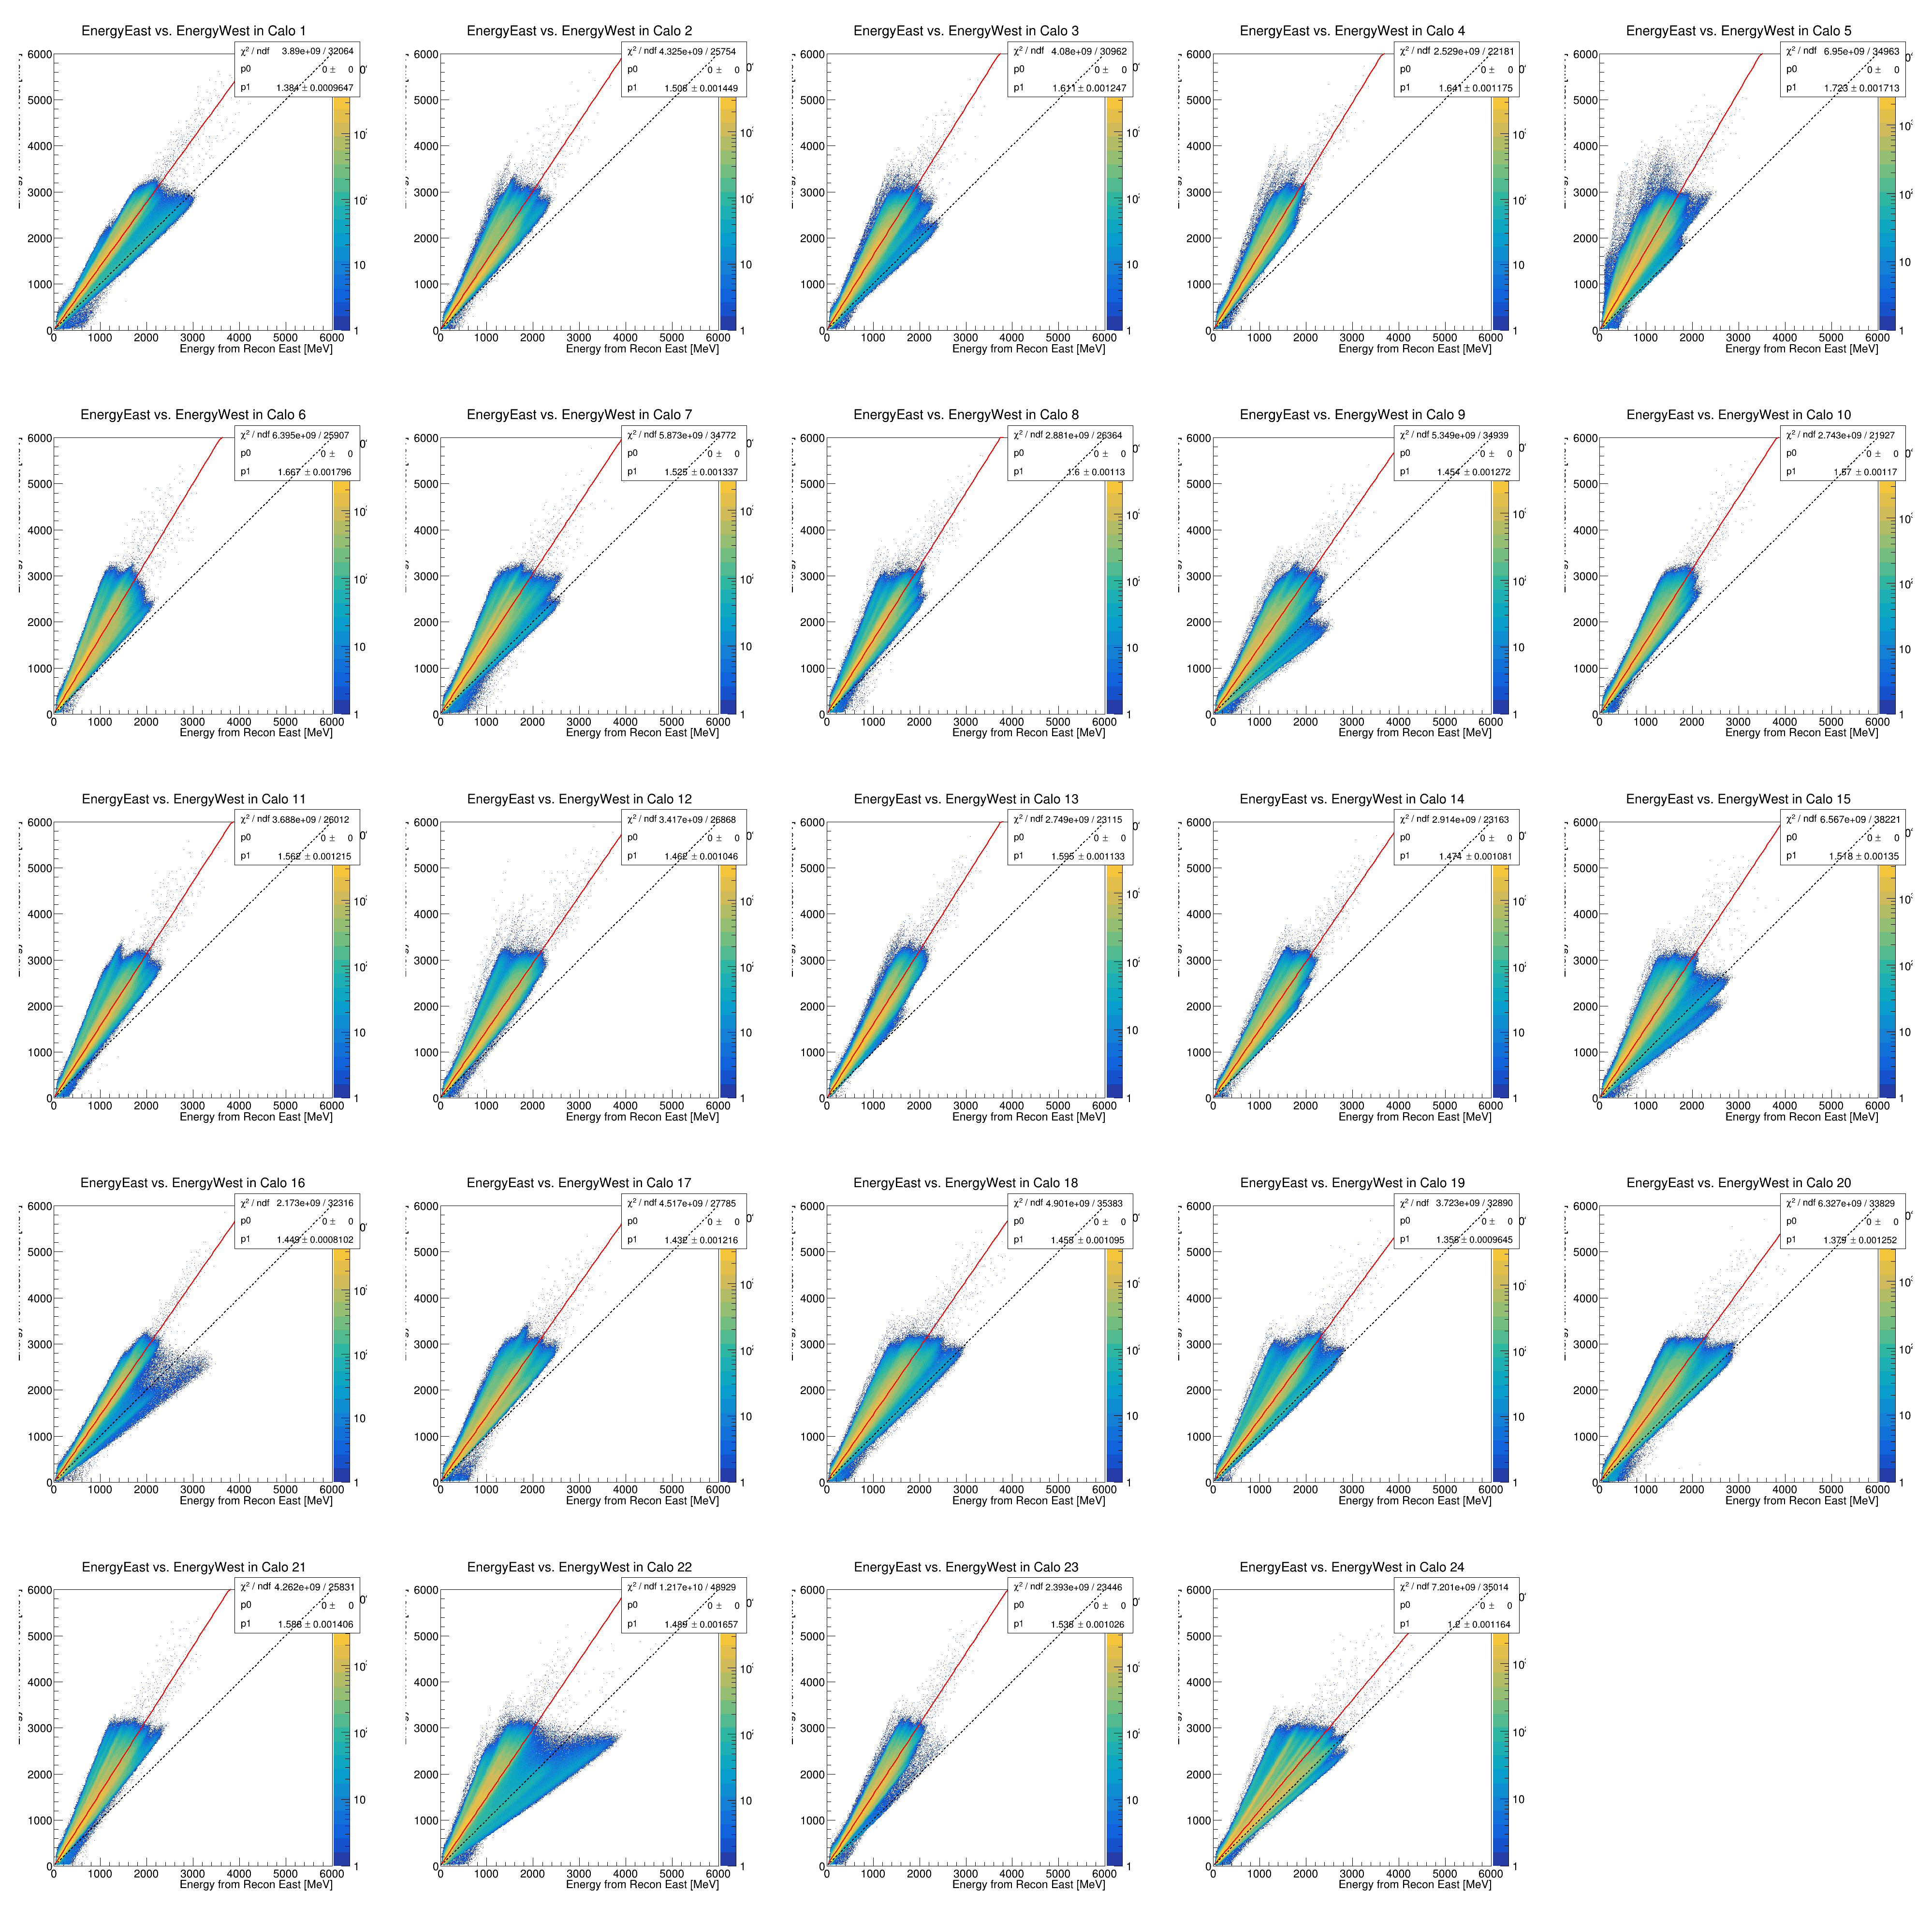

In [10]:
r.gStyle.SetOptFit(1)

evwEnergyEvWvec = []
for calo in range(1,25):
    evwEnergyEvW_i = f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").Clone()
    evwEnergyEvWvec.append( evwEnergyEvW_i.Clone( "h"+str(calo) ) )
    
c5 = r.TCanvas("c5","c5",4000,4000)
c5.Divide(5,5)

actualslope_i = r.TF1("actualslope_i","pol1",0,6000)
actualslope_i.FixParameter(0,0)

slopeVec = []

for i, hist in enumerate(evwEnergyEvWvec):
    c5.cd(i+1)
    r.gPad.SetLogz()
    #hist.Rebin2D(5,5)
    hist.GetXaxis().SetRangeUser(0,6000)
    hist.GetYaxis().SetRangeUser(0,6000)
    
    hist.Fit("actualslope_i","REMBQ")
    hist.Draw("COLZ")
    onetoone.Draw("SAME")
    
    slopeVec.append(actualslope_i.GetParameter(1))
    
c5.Draw()
c5.Print("./c5.root")

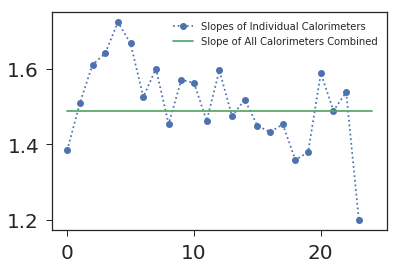

In [11]:
plt.plot(slopeVec,'o:',label='Slopes of Individual Calorimeters')
plt.plot([0,24],[actualslope.GetParameter(1),actualslope.GetParameter(1)], label='Slope of All Calorimeters Combined')
plt.legend()
plt.show()

We can also make the same plot for the WvE graphs, and then compare to make sure everything is still kosher

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::SaveAs>: ROOT file ./c5.root has been created


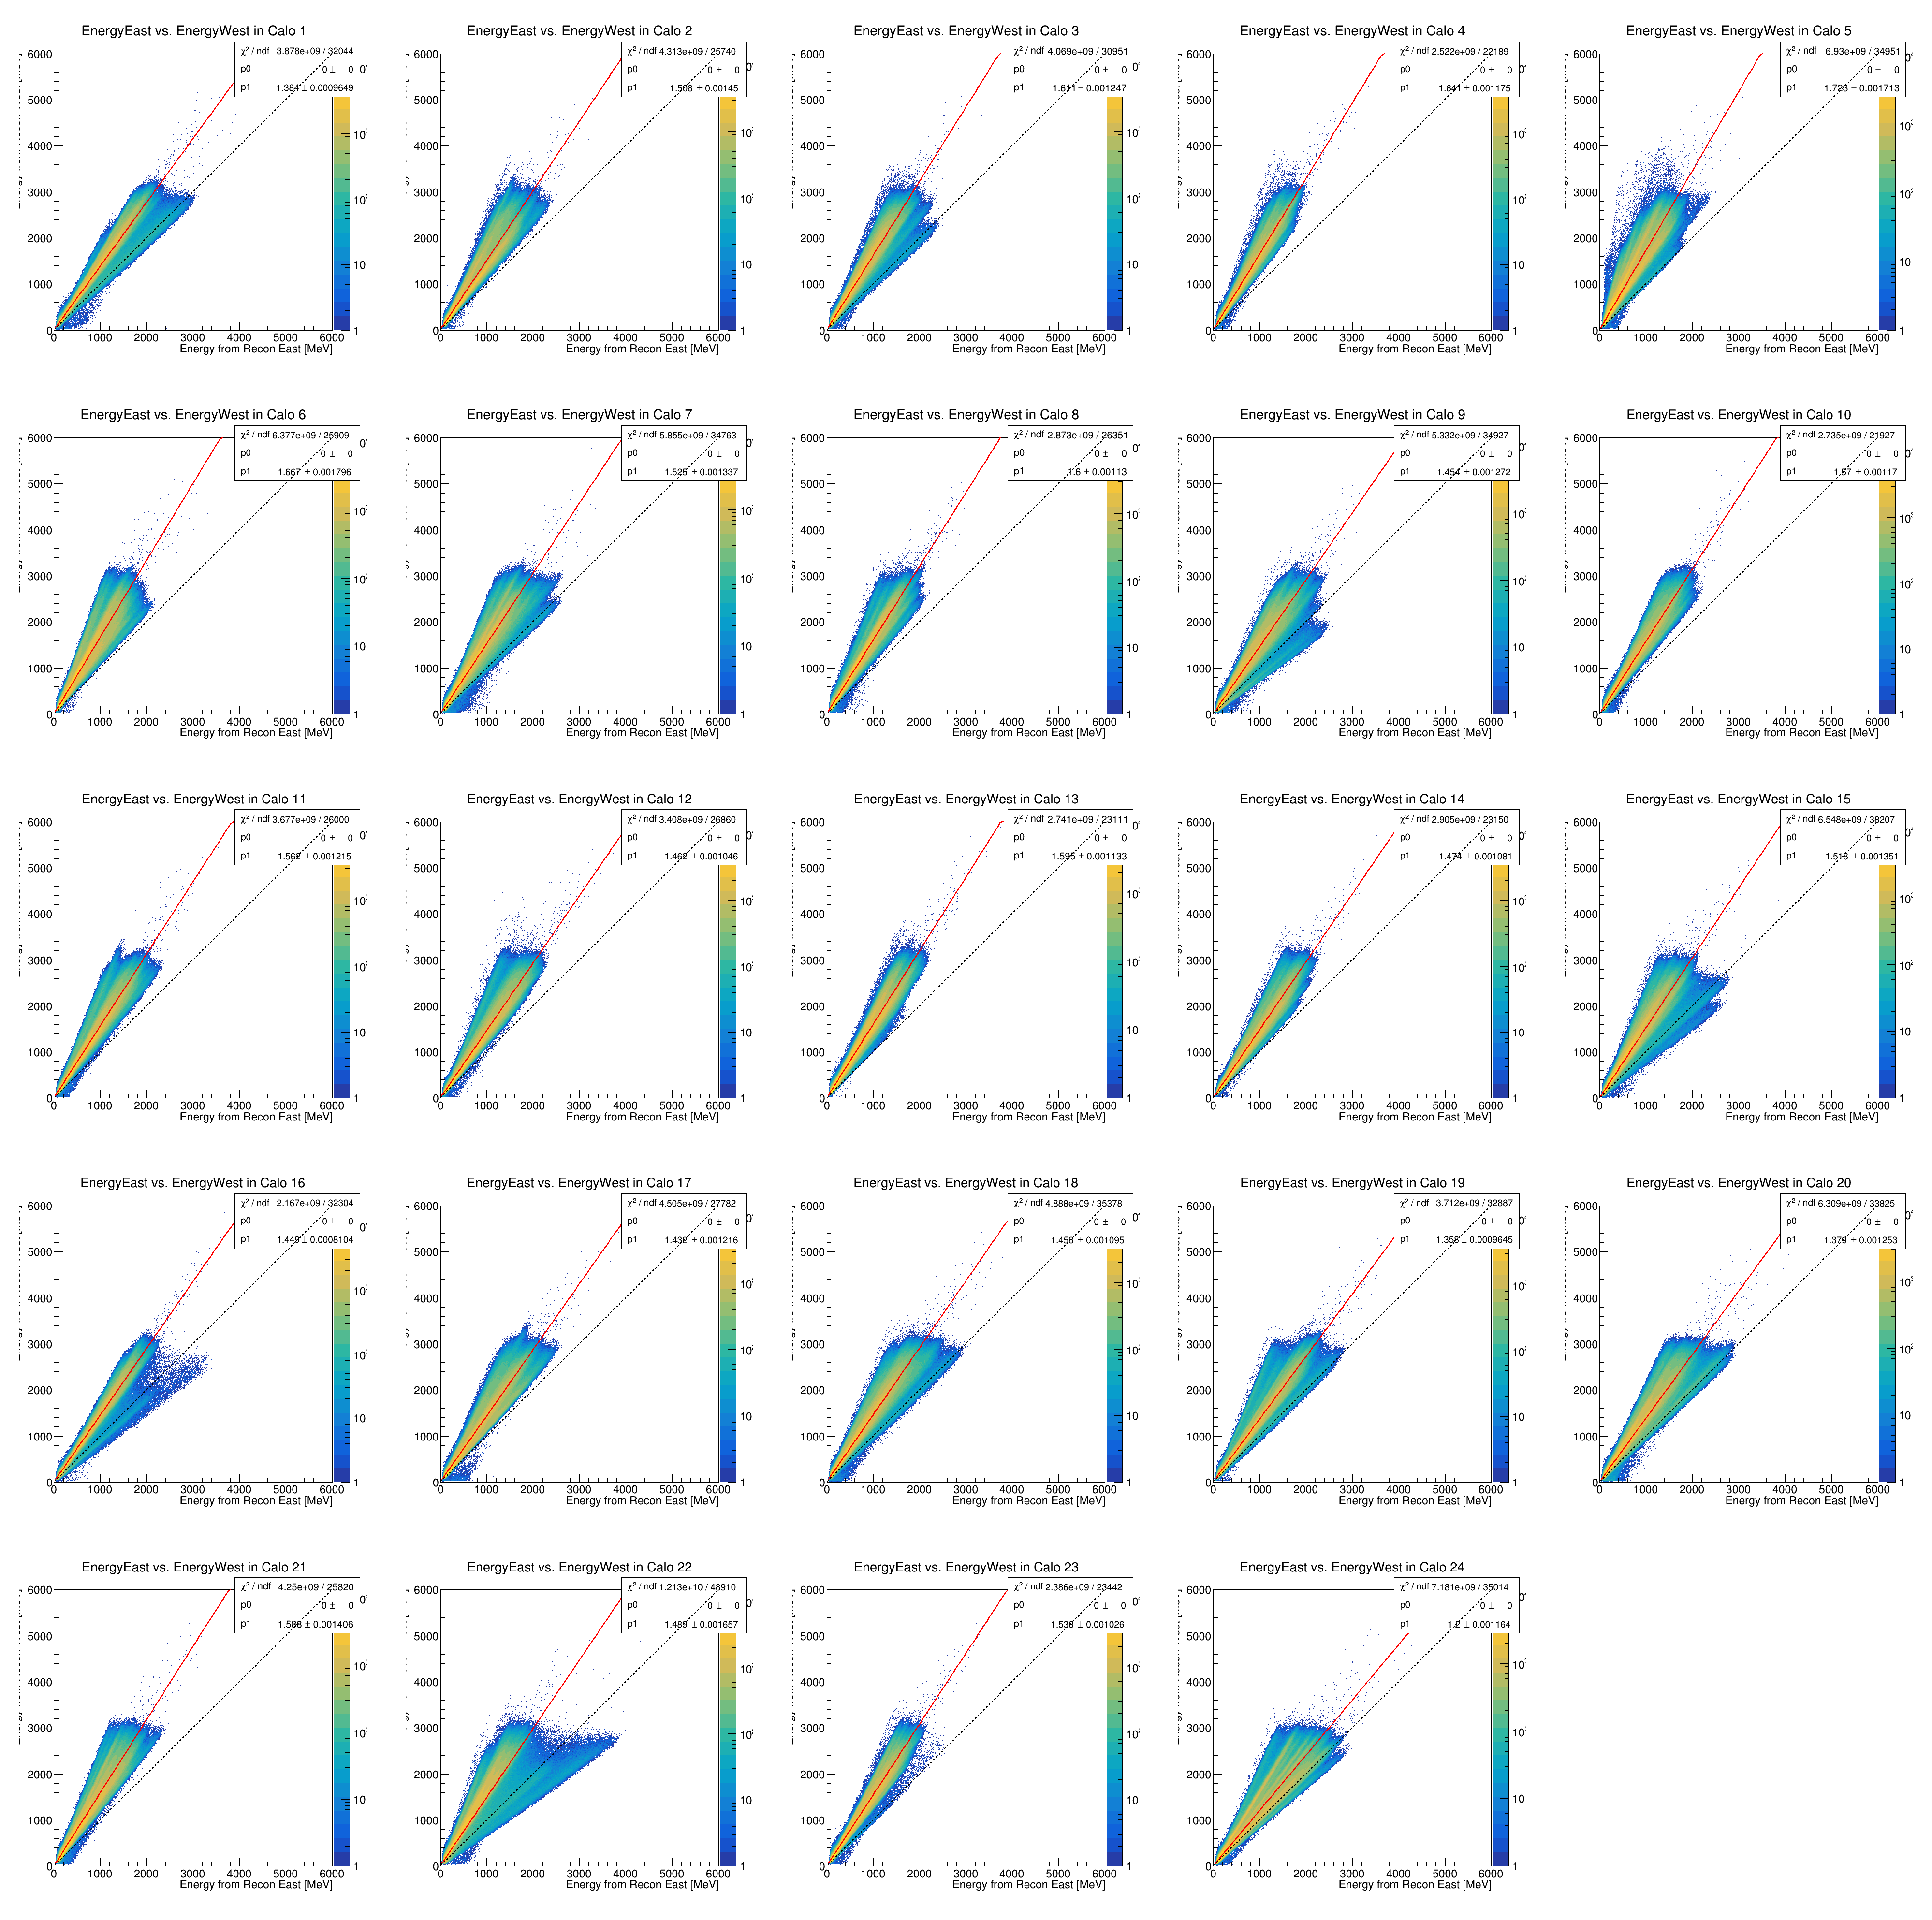

In [12]:
r.gStyle.SetOptFit(1)

wveEnergyEvWvec = []
for calo in range(1,25):
    wveEnergyEvW_i = f.Get("farline").Get("wve_calo"+str(calo)).Get("wveEnergyEvW").Clone()
    wveEnergyEvWvec.append( wveEnergyEvW_i.Clone( "h"+str(calo) ) )
    
c5 = r.TCanvas("c5","c5",4000,4000)
c5.Divide(5,5)

actualslope_i = r.TF1("actualslope_i","pol1",0,6000)
actualslope_i.FixParameter(0,0)

slopeVec = []

for i, hist in enumerate(wveEnergyEvWvec):
    c5.cd(i+1)
    r.gPad.SetLogz()
    #hist.Rebin2D(5,5)
    hist.GetXaxis().SetRangeUser(0,6000)
    hist.GetYaxis().SetRangeUser(0,6000)
    
    hist.Fit("actualslope_i","REMBQ")
    hist.Draw("COLZ")
    onetoone.Draw("SAME")
    
    slopeVec.append(actualslope_i.GetParameter(1))
    
c5.Draw()
c5.Print("./c5.root")

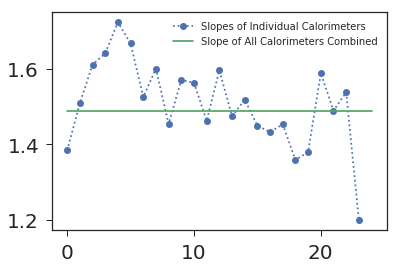

In [13]:
plt.plot(slopeVec,'o:',label='Slopes of Individual Calorimeters')
plt.plot([0,24],[actualslope.GetParameter(1),actualslope.GetParameter(1)], label='Slope of All Calorimeters Combined')
plt.legend()
plt.show()

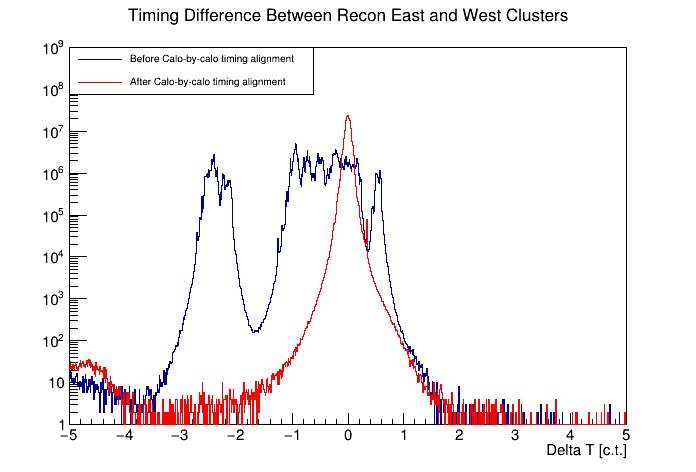

In [14]:
c = r.TCanvas()
evwDeltaTCalo = f.Get("farline").Get("evwDeltaTCalo").ProjectionX()
evwDeltaTCalo.SetTitle("Timing Difference Between Recon East and West Clusters")
evwDeltaTCalo.Draw()

evwDeltaTCaloAfterCorr = f.Get("farline").Get("evwDeltaTCaloAfterCorr").ProjectionX()
evwDeltaTCaloAfterCorr.SetLineColor(2)
evwDeltaTCaloAfterCorr.Draw("SAME")

evwDeltaTCalo.GetYaxis().SetRangeUser(1,10**9)

leg = r.TLegend(0.1,0.8,0.45,0.9)
leg.AddEntry(evwDeltaTCalo ,"Before Calo-by-calo timing alignment", "l")
leg.AddEntry(evwDeltaTCaloAfterCorr ,"After Calo-by-calo timing alignment", "l")
leg.Draw()

c.SetLogy()
c.Draw()